In [20]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [21]:
movies = pd.read_csv('movies.csv',encoding = "ISO-8859-1")

In [22]:
movies.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [10]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6820 entries, 0 to 6819
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   budget    6820 non-null   float64
 1   company   6820 non-null   object 
 2   country   6820 non-null   object 
 3   director  6820 non-null   object 
 4   genre     6820 non-null   object 
 5   gross     6820 non-null   float64
 6   name      6820 non-null   object 
 7   rating    6820 non-null   object 
 8   released  6820 non-null   object 
 9   runtime   6820 non-null   int64  
 10  score     6820 non-null   float64
 11  star      6820 non-null   object 
 12  votes     6820 non-null   int64  
 13  writer    6820 non-null   object 
 14  year      6820 non-null   int64  
dtypes: float64(3), int64(3), object(9)
memory usage: 799.3+ KB


# Looking for Missing Values and Cleaning

<AxesSubplot:>

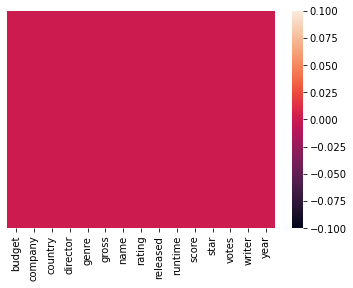

In [12]:
sns.heatmap(data=movies.isnull(), yticklabels = False)

In [24]:
for cols in movies.columns:
    percentage_miss = np.mean(movies[cols].isnull())
    print('{} - {}%'.format(cols, percentage_miss))

budget - 0.0%
company - 0.0%
country - 0.0%
director - 0.0%
genre - 0.0%
gross - 0.0%
name - 0.0%
rating - 0.0%
released - 0.0%
runtime - 0.0%
score - 0.0%
star - 0.0%
votes - 0.0%
writer - 0.0%
year - 0.0%


In [69]:
# No null values in the Dataset

In [31]:
movies['budget'] = movies['budget'].astype('int64')

In [32]:
movies['gross'] = movies['gross'].astype('int64')

In [39]:
movies['released'][1].split('-')[0]

'1986'

In [47]:
movies['year'] = movies['released'].apply(lambda x:x.split('-')[0])

In [51]:
movies.dropna()
movies.drop_duplicates()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,0,Fox Searchlight Pictures,UK,Mandie Fletcher,Comedy,4750497,Absolutely Fabulous: The Movie,R,2016-07-22,91,5.4,Jennifer Saunders,9161,Jennifer Saunders,2016
6816,0,Siempre Viva Productions,USA,Paul Duddridge,Drama,28368,Mothers and Daughters,PG-13,2016-05-06,90,4.9,Selma Blair,1959,Paige Cameron,2016
6817,3500000,Warner Bros. Animation,USA,Sam Liu,Animation,3775000,Batman: The Killing Joke,R,2016-07-25,76,6.5,Kevin Conroy,36333,Brian Azzarello,2016
6818,0,Borderline Presents,USA,Nicolas Pesce,Drama,25981,The Eyes of My Mother,R,2016-12-02,76,6.2,Kika Magalhães,6947,Nicolas Pesce,2016


# Looking for Correlations

In [67]:
#I guess that Budget and Gross Revenue have a high correlation. Let's Check out

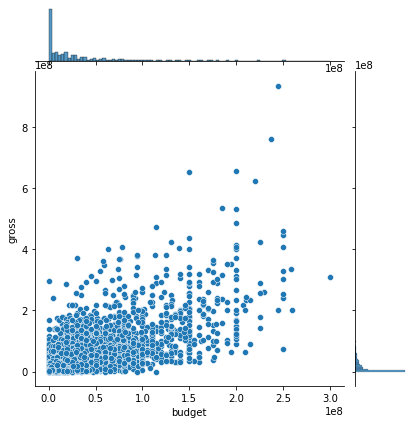

In [66]:
sns.jointplot(data = movies, x='budget', y='gross')

<AxesSubplot:xlabel='budget', ylabel='gross'>

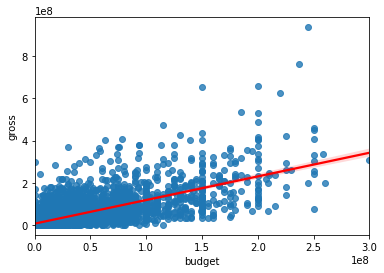

In [62]:
sns.regplot(data = movies, x='budget', y='gross',line_kws = {'color':'red'})

In [63]:
movies.corr()

,budget,gross,runtime,score,votes
budget,1.000000,0.712196,0.268226,0.042145,0.503924
gross,0.712196,1.000000,0.224579,0.165693,0.662457
runtime,0.268226,0.224579,1.000000,0.395343,0.317399
score,0.042145,0.165693,0.395343,1.000000,0.393607
votes,0.503924,0.662457,0.317399,0.393607,1.000000


<AxesSubplot:>

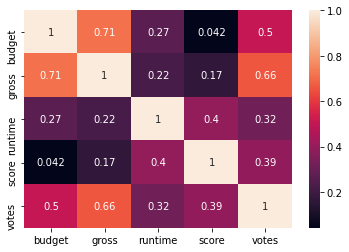

In [65]:
sns.heatmap(data=movies.corr(), annot=True)

In [68]:
# As I have guessed, Budget and Gross revenue have a correlation of 0,71, really high!

In [70]:
# Now Let's see if Company have a correlation with de Revenue 

In [83]:
movies['num_comp'] = movies['company'].astype('category').cat.codes
movies.head()
    

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,num_comp
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,665
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986,1680
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,1680
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,2062
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,2122


In [86]:
movies_num = movies

for cols in movies_num.columns: 
    if movies_num[cols].dtype == "object":
        movies_num[cols] = movies_num[cols].astype("category")
        movies_num[cols] = movies_num[cols].cat.codes 

In [87]:
movies_num.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,num_comp
0,8000000,665,54,2192,1,52287414,4661,8,39,89,8.1,2454,299174,3716,0,665
1,6000000,1680,54,1296,4,70136369,1821,7,27,103,7.8,1605,264740,1970,0,1680
2,15000000,1680,54,2645,0,179800601,6203,6,23,110,6.9,2345,236909,1852,0,1680
3,18500000,2062,54,1066,0,85160248,295,8,33,137,8.4,2192,540152,1629,0,2062
4,9000000,2122,54,2123,1,18564613,1872,6,36,90,6.9,1139,36636,2549,0,2122


<AxesSubplot:>

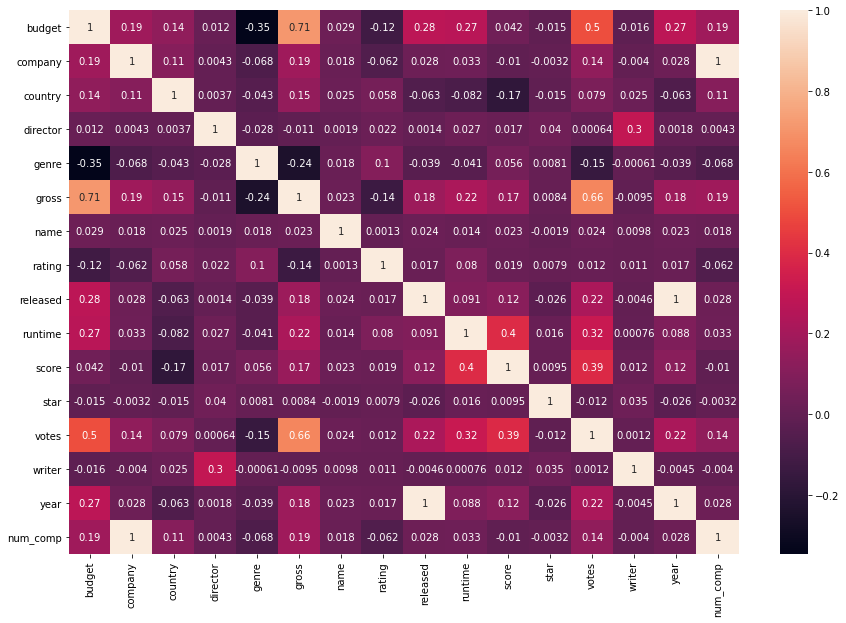

In [94]:
plt.figure(figsize=(15,10))
sns.heatmap(movies_num.corr(), annot= True)

In [95]:
# as we can see the only thing besides budget that have a high correlation with gross revenue is votes